In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, random, partial, lax

import context

from models.bayesian_NN.NN_model import logprior, loglikelihood, init_network, get_ECE_MCE
from models.bayesian_NN.NN_data import X_train, y_train, X_test, y_test
from models.bayesian_NN.util import load_NN_MAP, add_noise_NN_params
from util import flatten_param_list

from tuning.mamba import timed_sampler
from tuning.ksd import imq_KSD
from sgmcmcjax.kernels import build_sgld_kernel, build_sghmc_kernel, build_sgldCV_kernel, build_badodab_kernel, build_baoab_kernel, build_sgnht_kernel


# NN


In [4]:

# batch_size = int(1*X_train.shape[0])
data = (X_train, y_train)


key = random.PRNGKey(0)
Niters = 1000
key, subkey = random.split(key)
params_IC = add_noise_NN_params(subkey, load_NN_MAP(), 0.)
batch_size = int(0.01*X_train.shape[0])
centering_value = load_NN_MAP()

## timed sampler

451


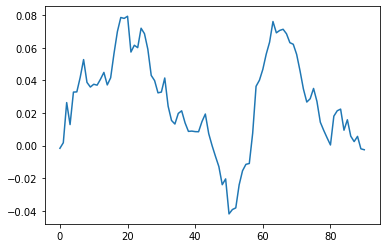

In [5]:
build_timed_sampler = timed_sampler(build_sgld_kernel)

my_timed_sampler = build_timed_sampler(1e-5, loglikelihood, logprior, data, batch_size)
samples, mygrads = my_timed_sampler(key, 1, params_IC)

print(len(samples))

thin = 5
# plot
samples = flatten_param_list(samples[::thin])
mygrads = flatten_param_list(mygrads[::thin])

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

# idx = 7
# plt.plot(np.array(mygrads)[:, idx])
# plt.show()


In [6]:
samples, mygrads = my_timed_sampler(key, 4, params_IC)

print(len(samples))



1772


In [7]:
from models.bayesian_NN.util import flatten_NN_params

In [8]:
thin = 1
# plot
mysamples = flatten_param_list(samples[::thin])

print(len(samples))

1772


In [ ]:
flatten_NN_params(samples)

In [ ]:
get_ECE_MCE(mysamples, X_test, y_test, M=10)

In [ ]:
mysamples.shape

In [26]:
# 1
print(samples.shape)
print(imq_KSD(samples, mygrads))

(8, 79510)
496.57538


In [29]:
# 0.1
print(samples.shape)
print(imq_KSD(samples, mygrads))

(54, 79510)
464.72046


In [81]:
build_timed_sampler = timed_sampler(build_sghmc_kernel)

batch_size = int(0.01*X_train.shape[0])
my_timed_sampler = build_timed_sampler(1e-5, 5, loglikelihood, logprior, data, batch_size)
samples, mygrads = my_timed_sampler(key, 0.1, params_IC)

# # plot
# samples = flatten_param_list(samples)

# idx = 7
# plt.plot(np.array(samples)[:, idx])
# plt.show()

# print(samples.shape)

In [ ]:

samples, mygrads = my_timed_sampler(key, 15, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)
idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()


print(samples.shape)

In [79]:
from tuning.ksd import imq_KSD

In [80]:
imq_KSD(samples, mygrads)

DeviceArray(1076.1542, dtype=float32)

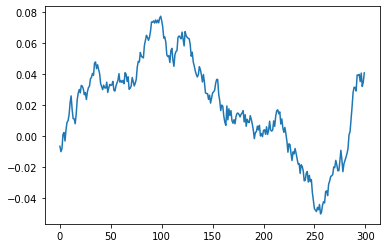

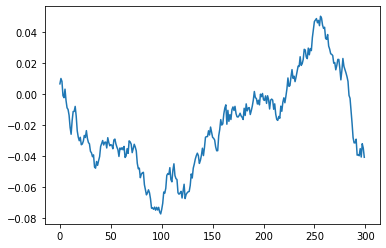

In [4]:
build_timed_sampler = timed_sampler(build_sgldCV_kernel)

my_timed_sampler = build_timed_sampler(1e-5, loglikelihood, logprior, data, batch_size, params_IC)
samples, mygrads = my_timed_sampler(key, 1, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()


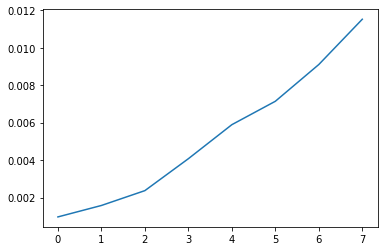

(8, 79510)


In [15]:
build_timed_sampler = timed_sampler(build_sgnht_kernel)

batch_size = int(0.1*X_train.shape[0])
my_timed_sampler = build_timed_sampler(1e-5, loglikelihood, logprior, data, batch_size)
samples, mygrads = my_timed_sampler(key, 0.1, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

print(samples.shape)

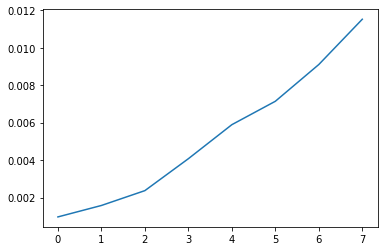

(8, 79510)


In [16]:
samples, mygrads = my_timed_sampler(key, 0.1, params_IC)

# plot
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()

print(samples.shape)